# Resampling well data
Dongfang Qu, University of Copenhagen

In this notebook I show how to make a well log dataset with consistent depth values. The original data are well logs (Porosity, permeability, velocity, gamma, density) with unconsistent depth values due to different sampling spacing, which cannot be used for machine learning such as regression or classification.

In [67]:
import pandas as pd
df = pd.read_csv('Data.csv')
df.head(5)

,depth_core,k,porosity,depth_Vp,Vp,depth_gamma,gamma,depth_density,density
0,0.92,26.99,35.1,40.112,3323.37,0.394,4.14,0.7648,0.02
1,1.63,56.90,37.1,40.162,3445.86,0.444,3.95,0.7867,0.02
2,2.84,62.87,38.2,40.212,2962.82,0.494,3.82,0.8085,0.01
3,5.94,32.43,37.1,40.262,2518.69,0.544,3.87,0.8304,0.02
4,6.94,124.87,38.4,40.312,2361.44,0.594,4.06,0.8523,0.02


In [68]:
depth_core = df[['depth_core']].values.ravel()[0:485]
depth_Vp = df[['depth_Vp']].values.ravel()[:8159]
depth_gamma = df[['depth_gamma']].values.ravel()[:8916]
depth_density = df[['depth_density']].values.ravel()[:56004]
k = df[['k']].values.ravel()[:485]
porosity = df[['porosity']].values.ravel()[:485]
Vp = df[['Vp']].values.ravel()[:8159]
gamma = df[['gamma']].values.ravel()[:8916]
density= df[['density']].values.ravel()[:56004]
print(max(depth_core))
print(max(depth_gamma))
print(max(depth_Vp))
print(max(depth_density))

455.95
446.144
448.212
456.1951


In [70]:
import numpy as np
# select Vp, density, gamma values corresponding to depth_core
Vp_selected = np.interp(depth_core, depth_Vp, Vp)  
density_selected = np.interp(depth_core, depth_density, density)
gamma_selected = np.interp(depth_core, depth_gamma, gamma)
porosity_selected = np.interp(depth_core, depth_core, porosity)
k_selected = np.interp(depth_core, depth_core, k)

In [71]:
Vp_selected=np.reshape(Vp_selected, (485,1))
density_selected = np.reshape(density_selected,(485,1))
gamma_selected = np.reshape(gamma_selected,(485,1))
porosity_selected = np.reshape(porosity_selected,(485,1))
k_selected = np.reshape(k_selected,(485,1))
depth_core = np.reshape(depth_core,(485,1))

In [52]:
data = np.concatenate((depth_core, Vp_selected, density_selected, gamma_selected, porosity_selected, k_selected),axis=1)
data.shape

(485, 6)

In [54]:
df_new = pd.DataFrame(data=data, columns=['depth','Vp','density','gamma','porosity','permeability'])
df_new.head(5)

,depth,Vp,density,gamma,porosity,permeability
0,0.92,3323.37,0.028995,3.2500,35.1,26.99
1,1.63,3323.37,1.752740,2.9532,37.1,56.90
2,2.84,3323.37,0.817521,3.3852,38.2,62.87
3,5.94,3323.37,2.014375,1.4556,37.1,32.43
4,6.94,3323.37,2.599167,2.0148,38.4,124.87


In [77]:
df_new.tail(15)

,depth,Vp,density,gamma,porosity,permeability
470,442.96,2994.5892,2.270392,2.0816,29.25,1.42
471,443.69,3331.6904,2.292871,2.1776,32.26,2.14
472,444.81,3209.8864,2.182245,2.6104,32.43,1.60
473,445.75,3347.0164,2.293232,2.3592,31.86,1.77
474,446.67,2989.1776,2.250000,1.2100,31.60,1.98
475,447.65,2887.4732,2.264848,1.2100,33.37,2.64
476,448.59,2874.9500,2.229694,1.2100,31.93,1.22
477,449.57,2874.9500,2.207172,1.2100,35.90,NaN
478,450.48,2874.9500,2.280000,1.2100,32.01,1.50
479,451.44,2874.9500,2.345463,1.2100,26.82,0.96


Note some Vp and gamma values at depth larger than 448m and 446m need to be removed.

Now all the well logs have consistent depth values, and can be used for data analysis.

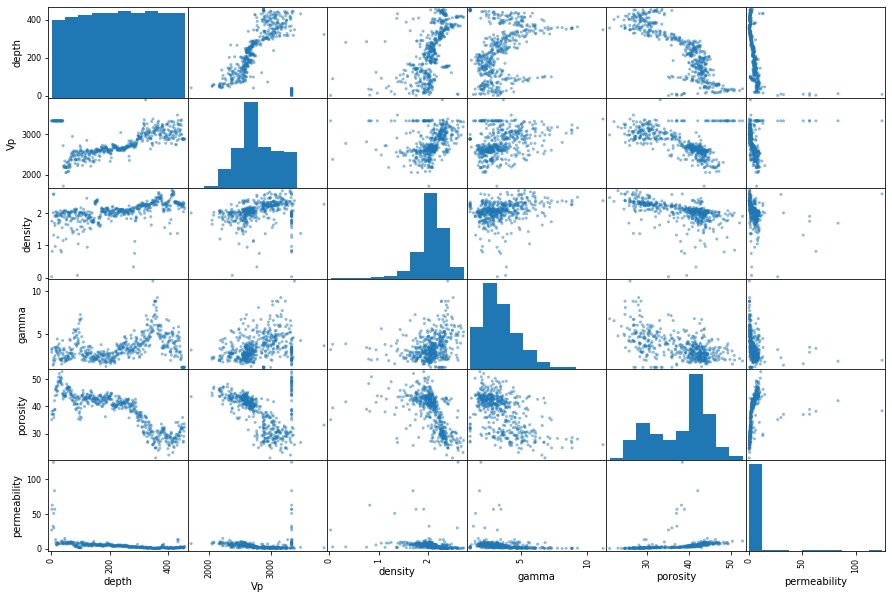

In [65]:
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
scatter_matrix(df_new,figsize=(15,10))
plt.show()